In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/Language_Detection(1).csv")

In [ ]:
data.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [ ]:
data.shape

(10402, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10402 entries, 0 to 10401
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10402 non-null  object
 1   Language  10402 non-null  object
dtypes: object(2)
memory usage: 162.7+ KB


In [ ]:
data.isnull().sum()

Text        0
Language    0
dtype: int64

In [ ]:
len(data[data.duplicated()])

66

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(10336, 2)

In [ ]:
data["Language"].nunique()

17

In [ ]:
data["Language"].value_counts()

English       1382
French        1007
Spanish        816
Portugeese     736
Italian        694
Russian        688
Sweedish       673
Malayalam      591
Dutch          542
Arabic         532
Turkish        471
German         465
Tamil          464
Danish         424
Kannada        366
Greek          358
Hindi          127
Name: Language, dtype: int64

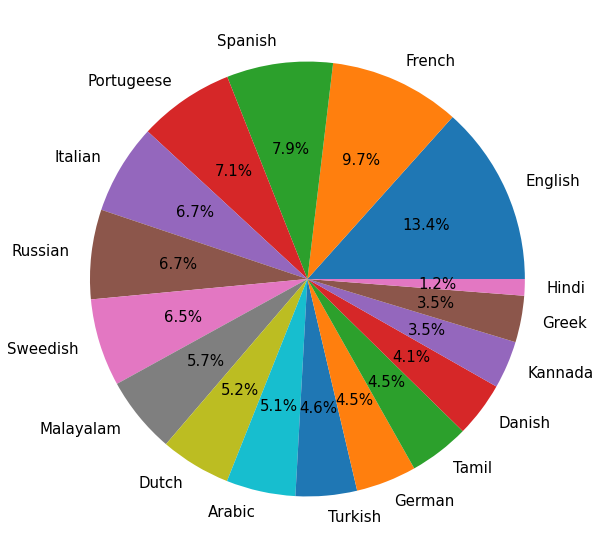

In [ ]:
language = data["Language"].value_counts().reset_index()

plt.figure(figsize=(10,10))
labels= language['index']

plt.pie(language["Language"], labels= labels, autopct='%.1f%%', textprops={'fontsize': 15})
plt.show()

In [ ]:
data1 = data.copy()
data1["cleaned_Text"] = ""
data1

,Text,Language,cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,
1,"""Nature"" can refer to the phenomena of the phy...",English,
2,"The study of nature is a large, if not the onl...",English,
3,"Although humans are part of nature, human acti...",English,
4,[1] The word nature is borrowed from the Old F...,English,
...,...,...,...
10397,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,
10398,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,
10399,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,
10400,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,


In [ ]:
def clean_func(Text):
  Text = re.sub(r'[\([{})\]!@#$,"%^*?:;~`0-9]', ' ', Text)   # removing the symbols and numbers
  Text = Text.lower()   # converting the text to lower case
  Text = re.sub('#\S+', '', Text)  # remove hashtags

  return Text

In [ ]:
data1["cleaned_Text"] = data1["Text"].apply(lambda x:clean_func(x))
data1

,Text,Language,cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,nature in the broadest sense is the natural...
1,"""Nature"" can refer to the phenomena of the phy...",English,nature can refer to the phenomena of the phy...
2,"The study of nature is a large, if not the onl...",English,the study of nature is a large if not the onl...
3,"Although humans are part of nature, human acti...",English,although humans are part of nature human acti...
4,[1] The word nature is borrowed from the Old F...,English,the word nature is borrowed from the old f...
...,...,...,...
10397,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10398,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10399,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...
10400,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...


In [ ]:
X = data1["cleaned_Text"]
y = data1["Language"]

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
CV = CountVectorizer()
X = CV.fit_transform(X).toarray()

In [ ]:
X.shape

(10336, 39480)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
 from sklearn.naive_bayes import MultinomialNB
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.linear_model import LogisticRegression

 models = {"M_Naive_Bayes" : MultinomialNB(), "Random_Forest" : RandomForestClassifier(),"Logistic_Regression":LogisticRegression()}

In [ ]:
for name, model in models.items():
    print( f'{name} training started...')
    model.fit(X_train, y_train)
    print(f'{name} trained.')

M_Naive_Bayes training started...
M_Naive_Bayes trained.
Random_Forest training started...
Random_Forest trained.
Logistic_Regression training started...
Logistic_Regression trained.


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
for name in models:
  acc_score = accuracy_score(y_test, models.get(name).predict(X_test))
  print(f'{name} accuracy score :  {acc_score}')

M_Naive_Bayes accuracy score :  0.9791021671826625
Random_Forest accuracy score :  0.9237616099071208
Logistic_Regression accuracy score :  0.9558823529411765


In [ ]:
def prediction(text):
    for name in models:
        # model = models.get(name)
        print("prediction of "+name)
        x = CV.transform([text]).toarray()  # converting text to bag of words model (Vector)
        lang = model.predict(x) # predicting the language
        lang = encoder.inverse_transform(lang) # finding the language corresponding to the predicted value
        print("The langauge is in",lang[0])  # printing the language

In [ ]:
prediction( "நான் உன்னை காதலிக்கிறேன்")

prediction of M_Naive_Bayes
The langauge is in Tamil
prediction of Random_Forest
The langauge is in Tamil
prediction of Logistic_Regression
The langauge is in Tamil


In [ ]:
prediction("आपको क्या हो गया है यह उसी दिन से है")

prediction of M_Naive_Bayes
The langauge is in Hindi
prediction of Random_Forest
The langauge is in Hindi
prediction of Logistic_Regression
The langauge is in Hindi


Appending a seperate dataset to support hindi language

In [ ]:
data.shape

(10336, 2)

In [ ]:
data2 = pd.read_csv("/content/hindi.csv")

In [ ]:
data2.shape

(718, 2)

In [ ]:
data3 = data.append(data2,ignore_index=True)

In [ ]:
data3.shape

(11054, 2)

In [ ]:
data3["Language"].value_counts()

English       1382
French        1007
Hindi          845
Spanish        816
Portugeese     736
Italian        694
Russian        688
Sweedish       673
Malayalam      591
Dutch          542
Arabic         532
Turkish        471
German         465
Tamil          464
Danish         424
Kannada        366
Greek          358
Name: Language, dtype: int64

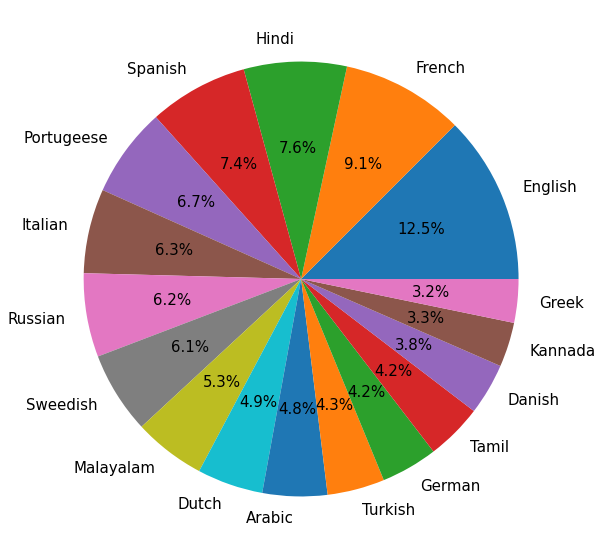

In [ ]:
language = data3["Language"].value_counts().reset_index()

plt.figure(figsize=(10,10))
labels= language['index']

plt.pie(language["Language"], labels= labels, autopct='%.1f%%', textprops={'fontsize': 15})
plt.show()

In [ ]:
data3["cleaned_Text"] = data3["Text"].apply(lambda x:clean_func(x))
data3

,Text,Language,cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,nature in the broadest sense is the natural...
1,"""Nature"" can refer to the phenomena of the phy...",English,nature can refer to the phenomena of the phy...
2,"The study of nature is a large, if not the onl...",English,the study of nature is a large if not the onl...
3,"Although humans are part of nature, human acti...",English,although humans are part of nature human acti...
4,[1] The word nature is borrowed from the Old F...,English,the word nature is borrowed from the old f...
...,...,...,...
11049,31 अक्टूबर 1984 को काला दिवस कहा जाता है। इस द...,Hindi,अक्टूबर को काला दिवस कहा जाता है। इस द...
11050,\n\nगुंडे को देख सत्तर और अस्सी के दशक का सिने...,Hindi,\n\nगुंडे को देख सत्तर और अस्सी के दशक का सिने...
11051,Chandermohan.sharma@timesgroup.com ग्लैमर इंडस...,Hindi,chandermohan.sharma timesgroup.com ग्लैमर इंडस...
11052,"निर्माता :\nसुनीता गोवारीकर, अजय बिजली, संजीव ...",Hindi,निर्माता \nसुनीता गोवारीकर अजय बिजली संजीव ...


In [ ]:
data3.to_csv("preprocessed.csv",index=False,encoding='utf-8')

In [ ]:
X1 = data3["cleaned_Text"]
y1 = data3["Language"]

In [ ]:
y1.shape

(11054,)

In [ ]:

y1 = encoder.fit_transform(y1)

In [ ]:
y1.shape

(11054,)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(analyzer='char', ngram_range=(1, 3))

In [ ]:
X1 = tf.fit_transform(X1).toarray()

In [ ]:
X1.shape

(11054, 76126)

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42)

In [ ]:
for name, model in models.items():
    print( f'{name} training started...')
    model.fit(X1_train, y1_train)
    print(f'{name} trained.')

M_Naive_Bayes training started...
M_Naive_Bayes trained.
Random_Forest training started...
Random_Forest trained.
Logistic_Regression training started...
Logistic_Regression trained.


In [ ]:
for name in models:
  acc_score = accuracy_score(y1_test, models.get(name).predict(X1_test))
  print(f'{name} accuracy score :  {acc_score}')

M_Naive_Bayes accuracy score :  0.8299565846599132
Random_Forest accuracy score :  0.9706946454413893
Logistic_Regression accuracy score :  0.9844428364688856


In [ ]:
X2= data3["cleaned_Text"]
Y2=data3["Language"]

In [ ]:
Y2.shape

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tf=TfidfVectorizer()

In [ ]:
# X2= tf.fit_transform(X2).toarray()

In [ ]:
# X2.shape

In [ ]:
# Y2= encoder.fit_transform(Y2)

In [ ]:
# Y2.shape

In [ ]:
# X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, random_state=42)